In [117]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
import operator
from sklearn import cluster
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
from collections import defaultdict
from gensim.parsing.porter import PorterStemmer

In [119]:
YEAR = 2015
NUM_RELEVANT_WORDS = 2000
NUM_CLUSTERS = 25

df = pd.read_csv('news_headlines.csv')
uw_df = pd.read_csv('useless_words.csv')
df.describe()

stemmer= PorterStemmer()

# process input

headlines_by_year = defaultdict(list)
original_headlines_by_year = defaultdict(list)
bag_of_words_by_year = defaultdict(lambda: defaultdict(int))

useless_words = set(uw_df['useless_words'])
remove_characters = '!@#:;\'\"*)([]{}%.,&'
ignore_characters = '$0123456789'

print("|" + " "*101 + "|")
print("|", end="")
for i in range(len(df)):
    if i%(len(df)//100) == 0:
        print("=",end="")    
    year =  int(df['publish_date'][i]) // 10000
    if year != YEAR:
        continue
    original_headlines_by_year[year].append(df['headline_text'][i])
    words = df['headline_text'][i].split()
    headline = []
    for w in words:
        bad_word = False
        for r in w:
            if r in ignore_characters:
                bad_word = True
                break
        if bad_word:
            continue
        if w not in useless_words:
            stemmed_word = stemmer.stem(w.translate({i: None for i in remove_characters}))
            headline.append(stemmed_word)
            bag_of_words_by_year[year][stemmed_word] += 1
    headlines_by_year[year].append(headline)
print("|")


|                                                                                                     |
|=====================================================================================================|


In [120]:
BoW = bag_of_words_by_year[YEAR]
relevant_words = list(sorted(BoW.items(),key=operator.itemgetter(1))[-NUM_RELEVANT_WORDS:])

print(len(relevant_words))

indices = {word[0]:ind for ind, word in enumerate(relevant_words)}

print(indices)

2000
{'king': 1361, 'vic': 1786, 'juli': 1756, 'sa': 1986, 'fiona': 138, 'hawk': 770, 'malaysia': 778, 'trade': 1788, 'export': 1760, 'nation': 1981, 'recruit': 220, 'child': 1875, 'john': 1709, 'announc': 1754, 'sever': 1116, 'goal': 348, 'imag': 902, 'can': 1743, 'drink': 1190, 'marriag': 1494, 'drown': 661, 'sundai': 424, 'mental': 1584, 'paint': 202, 'push': 1845, 'thai': 545, 'cannabi': 1056, 'facil': 703, 'firm': 700, 'wast': 1276, 'happen': 323, 'asset': 493, 'winter': 679, 'bill': 1785, 'di': 1930, 'baird': 897, 'countri': 1998, 'ahead': 1822, 'hong': 209, 'allegedli': 1400, 'tonga': 124, 'surgeri': 708, 'warren': 69, 'darren': 216, 'decid': 723, 'scrap': 412, 'darwin': 1796, 'afghan': 311, 'mr': 529, 'dark': 44, 'messag': 596, 'school': 1937, 'rest': 90, 'summit': 453, 'offic': 1808, 'steven': 556, 'fc': 677, 'accus': 1923, 'rais': 1644, 'grant': 1357, 'troop': 598, 'banana': 1260, 'date': 847, 'confirm': 1448, 'gather': 764, 'theft': 757, 'mill': 838, 'set': 1915, 'forestri':

In [121]:
matrix = np.zeros((len(headlines_by_year[YEAR]),len(relevant_words)))

for row, hl in enumerate(headlines_by_year[YEAR]):
    for word in hl:
        if word in indices:
            matrix[row,indices[word]] = 1

print(matrix.shape)

(46060, 2000)


In [122]:

#grid search

if False:
    grid_search_matrix = np.array(matrix)
    np.random.shuffle(grid_search_matrix)
    grid_search_matrix = grid_search_matrix[:1000,:]

    labels = list(range(2,100))
    inertias = []

    for i in labels:
        print(i,end=' ')
        kmeans = cluster.KMeans(i,verbose = 0)
        kmeans.fit(grid_search_matrix)
        inertias.append(kmeans.inertia_)

    plt.plot(list(range(len(inertias))), [i for i in inertias])
    plt.show()


In [123]:
kmeans = cluster.KMeans(NUM_CLUSTERS,verbose=1)
kmeans.fit(matrix)
print(kmeans.labels_)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 196842.18701843685
start iteration
done sorting
end inner loop
Iteration 1, inertia 193421.22921011547
start iteration
done sorting
end inner loop
Iteration 2, inertia 191970.64680863213
start iteration
done sorting
end inner loop
Iteration 3, inertia 190998.96004689275
start iteration
done sorting
end inner loop
Iteration 4, inertia 190554.11827458703
start iteration
done sorting
end inner loop
Iteration 5, inertia 190531.14660079713
start iteration
done sorting
end inner loop
Iteration 6, inertia 190529.0613977545
start iteration
done sorting
end inner loop
Iteration 7, inertia 190528.9729786495
start iteration
done sorting
end inner loop
Iteration 8, inertia 190528.9729786495
center shift 0.000000e+00 within tolerance 2.181017e-07
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 196821.20455604122
start iteration
done sorting
end inner loop
Iteration 1, in

Iteration 0, inertia 198188.6634388734
start iteration
done sorting
end inner loop
Iteration 1, inertia 196476.17868975384
start iteration
done sorting
end inner loop
Iteration 2, inertia 193275.05232087264
start iteration
done sorting
end inner loop
Iteration 3, inertia 192145.21656069453
start iteration
done sorting
end inner loop
Iteration 4, inertia 191786.2795023892
start iteration
done sorting
end inner loop
Iteration 5, inertia 191511.0358208052
start iteration
done sorting
end inner loop
Iteration 6, inertia 191282.91344071188
start iteration
done sorting
end inner loop
Iteration 7, inertia 191274.93085619525
start iteration
done sorting
end inner loop
Iteration 8, inertia 191274.7566888232
start iteration
done sorting
end inner loop
Iteration 9, inertia 191274.36749980683
start iteration
done sorting
end inner loop
Iteration 10, inertia 191274.31640357344
start iteration
done sorting
end inner loop
Iteration 11, inertia 191274.31640357344
center shift 0.000000e+00 within toler

In [124]:
clusters = []
print("Generating cluster ", end='')

for i in range(NUM_CLUSTERS):
    print("{}, ".format(i),end='')
    nth_cluster = []
    freqs.append(defaultdict(int))
    filtered_matrix = matrix[kmeans.labels_ == i]
    for r in range(filtered_matrix.shape[0]):
        for c in range(filtered_matrix.shape[1]):
            if filtered_matrix[r][c] > 0:
                nth_cluster.append(relevant_words[c][0])
    clusters.append(nth_cluster)
print("")

Generating cluster 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 


In [125]:
biggest = (-1,-1)
for ind, nth_cluster in enumerate(clusters):
    number = len(kmeans.labels_[kmeans.labels_ == ind])
    print("Cluster", ind, ":", number , "headlines")
    biggest = max(biggest,(number,ind))
    # Most common words:
    if True:
        freq = defaultdict(int)
        for i in nth_cluster:
            freq[i] += 1
        most_common_words = sorted([(-freq[i],i) for i in freq.keys()])[:10]
        print("Most common words:"," ".join([i[1] for i in most_common_words]))

    # Closest to centroid:
    if True:
        print("Closest to centroid:")
        headlines_in_centroid = []
        for ind2, headline in enumerate(original_headlines_by_year[YEAR]):
            if kmeans.labels_[ind2] != ind:
                continue
            dist = np.linalg.norm(kmeans.cluster_centers_[ind] - matrix[ind2])
            headlines_in_centroid.append((dist,headline,headlines_by_year[YEAR][ind2]))
        headlines_in_centroid.sort()
        for i in headlines_in_centroid[:3]:
            print("  ",i[1])
            
    # Show wordcloud:
    if False:
        wordcloud = WordCloud(max_font_size=50,collocations=False).generate(" ".join(sorted(nth_cluster)))
        plt.figure(dpi=140)
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()


Cluster 0 : 64 headlines
Most common words: matt fever discuss brumbi final nrl report rugbi super afl
Closest to centroid:
   matt nable extraordinary metamorphosis actor
   maryborough embracing matt dellavedova fever
   one plus one matt nable
Cluster 1 : 751 headlines
Most common words: report school student high find abus children call nsw canberra
Closest to centroid:
   cowan intergenerational report
   disadvantage report
   jammie penm commodity report
Cluster 2 : 714 headlines
Most common words: rural qld nation new podcast report nsw sa vic health
Closest to centroid:
   rural
   rural heiferexpo
   rural sanger fletcher obe
Cluster 3 : 697 headlines
Most common words: charg murder polic child assault face drug woman against court
Closest to centroid:
   kerr charged over texts
   man charged with reckless wounding
   mason and matulino face shoulder charge punishment
Cluster 4 : 292 headlines
Most common words: port stephen adelaid macquari darwin plan leas council expans m

fitting TSNE
(1000, 2)


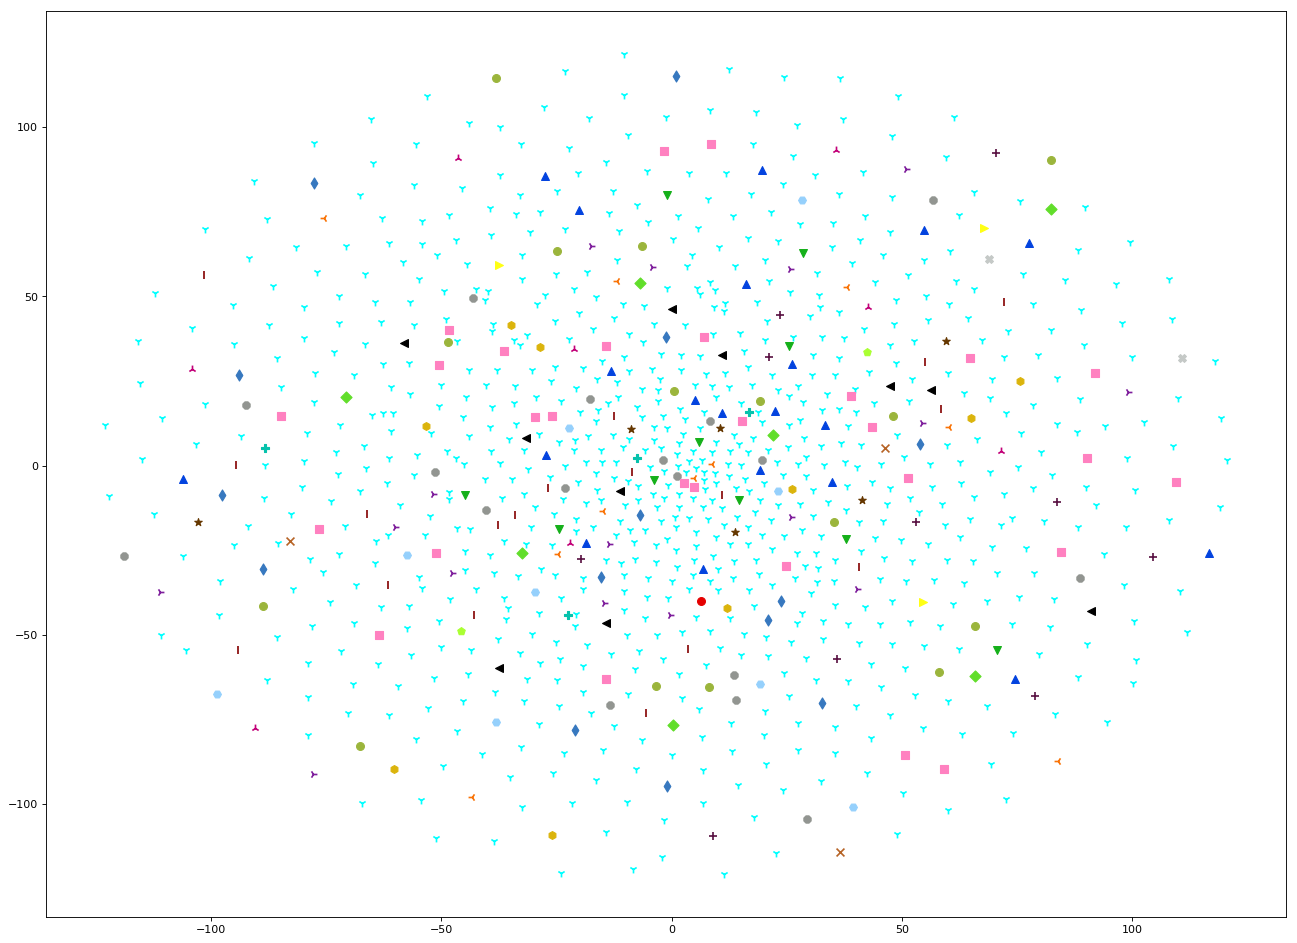

without biggest:


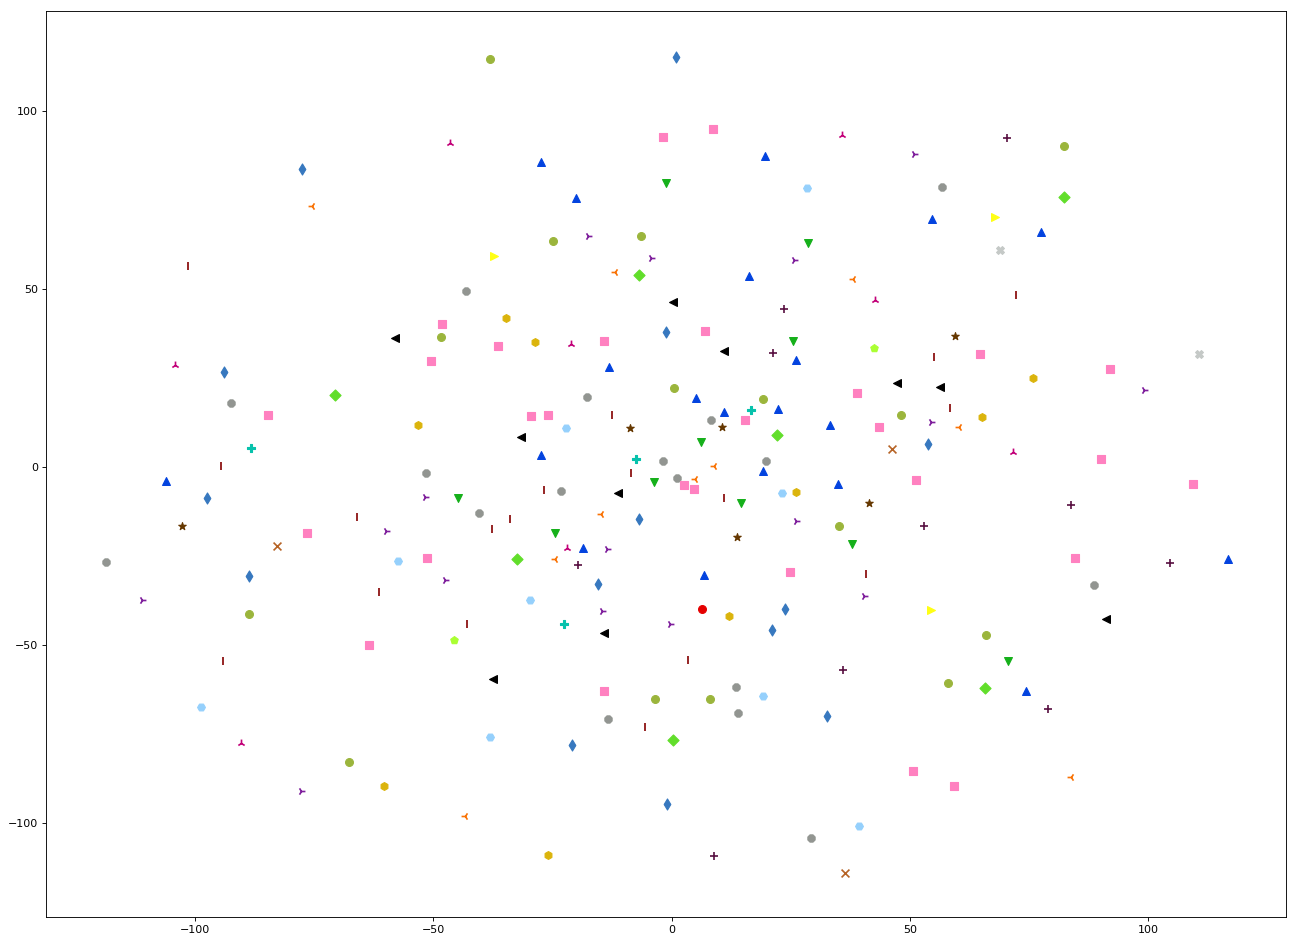

In [126]:
# show t-SNE visualisation

colors = [
"xkcd:red",
"xkcd:green",
"xkcd:blue",
"xkcd:black",
"xkcd:yellow",
"xkcd:cyan",
"xkcd:magenta",
"xkcd:orange",
"xkcd:purple",
"xkcd:gray",
"xkcd:pink",
"xkcd:lime",
"xkcd:turquoise",
"xkcd:brown",
"xkcd:gold",
"xkcd:light blue",
"xkcd:plum",
"xkcd:copper",
"xkcd:silver",
"xkcd:toxic green",
"xkcd:windows blue",
"xkcd:dark red",
"xkcd:dark gray",
"xkcd:booger",
"xkcd:bright sea green",
]*2

markers = [
"o",
"v",
"^",
"<",
">",
"1",
"2",
"3",
"4",
"8",
"s",
"p",
"P",
"*",
"h",
"H",
"+",
"x",
"X",
"D",
"d",
"|",
"_",
] * 3

print("fitting TSNE")

sample = np.array(matrix)
np.random.shuffle(sample)
sample = sample[:1000]

tsne = TSNE(n_components=2).fit_transform(sample)
print(tsne.shape)
plt.figure(figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(NUM_CLUSTERS):
    cluster = tsne[kmeans.labels_[:1000] == i]
    plt.scatter(cluster[:,0],cluster[:,1],c=colors[i],marker=markers[i],s=50)

plt.show()
    
print("without biggest:")
plt.figure(figsize=(20, 15), dpi=80, facecolor='w', edgecolor='k')
for i in range(NUM_CLUSTERS):
    if i == biggest[1]:
        continue
    cluster = tsne[kmeans.labels_[:1000] == i]
    plt.scatter(cluster[:,0],cluster[:,1],c=colors[i],marker=markers[i],s=50)

    
plt.show()


In [18]:
print(clusters)

[['association', 'sell', 'sale', 'off', 'fire', 'brace', 'crew', 'brisbane', 'fire', 'eye', 'st', 'crew', 'tasmanian', 'keep', 'close', 'fire', 'damage', 'west', 'house', 'car', 'fire', 'rage', 'tasmania', 'still', 'fire', 'response', 'park', 'under', 'national', 'fire', 'western', 'fire', 'assistance', 'ad', 'bill', 'under', 'fire', 'climate', 'ta', 'under', 'government', 'change', 'fire', 'chief', 'head', 'appeal', 'fire', 'taken', 'resident', 'hospital', 'fire', 'nrn', 'fire', 'plan', 'weekend', 'hot', 'threat', 'may', 'coast', 'fire', 'palm', 'zoo', 'victoria', 'oil', 'anti', 'campaign', 'under', 'fire', 'factory', 'eight', 'bangladesh', 'killed', 'fire', 'used', 'red', 'dog', 'fight', 'against', 'fire', 'inquest', 'hear', 'need', 'break', 'local', 'fire', 'west', 'ban', 'sa', 'fire', 'tight', 'detail', 'house', 'fire', 'police', 'danger', 'start', 'fire', 'appear', 'palestinian', 'hold', 'fire', 'bu', 'under', 'change', 'fire', 'govt', 'unit', 'newcastle', 'investigation', 'under'

In [39]:
print(kmeans.cluster_centers_.shape)
wordclouds = []
for cluster in kmeans.cluster_centers_:
    words = ""
    for i in range(len(cluster)):
        words += (sorted_dict[i][0] + ' ') * int(cluster[i]*100)
    print(words)
    wordclouds.append(WordCloud(max_font_size=50,collocations = False).generate(words))

(10, 2000)
advance illawarra pain garden tenni boycott gallery clinic retain route nadal nadal golf golf childcare childcare facility living crossing pga italian stosur davi prime authority lee ballarat enough sink pub summary door door door fisher federer federer federer broome easter museum museum taking defeat your upset george event hewitt traffic unit ambulance pull terror cabinet gain investment trading wrap familie thai well serie seat dump aged conference part scott scott must must bridge mount office merger pair waste councillor vow round round key re re united french french st reform upgrade point point third mental protester pledge energy player poll poll mark indonesia truck art inquest ready good stay stay troop research korea five expected plant victory care airport cancer japan president people murray murray trade rudd beat beat meet anti anti remain tiger tiger premier india join delay regional aid keep near ha station ta ta lose hold leave threat women chief local loca

catch catch catch catch catch catch living living living living living living follow follow follow follow follow follow thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve thieve nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab nab store store store store store store bligh bligh bligh bligh bligh bligh update update update update update update chopper chopper chopper chopper chopper chopper businesse businesse businesse businesse businesse businesse small small small small small small gain gain gain gain gain gain 

Cluster 0


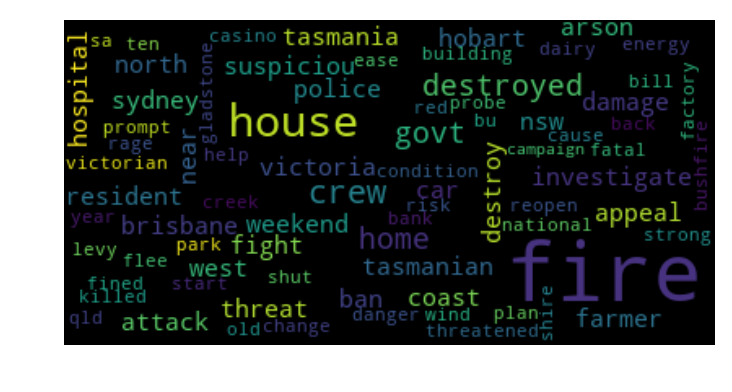

Cluster 1


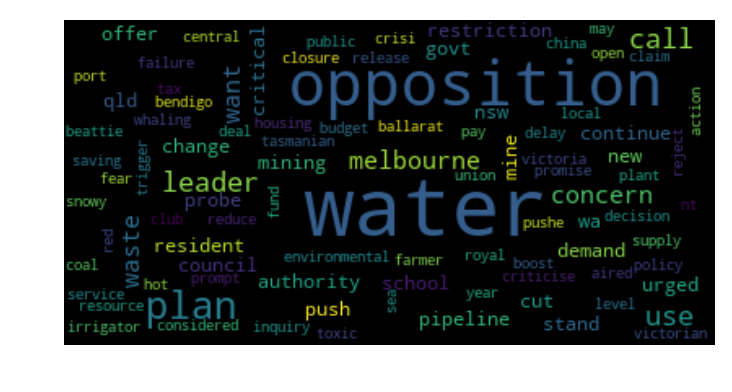

Cluster 2


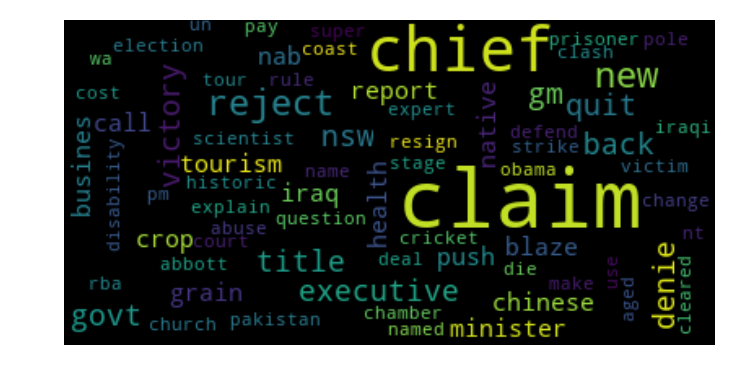

Cluster 3


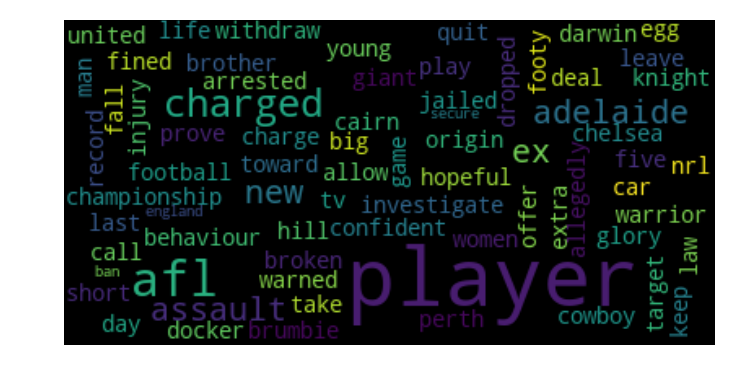

Cluster 4


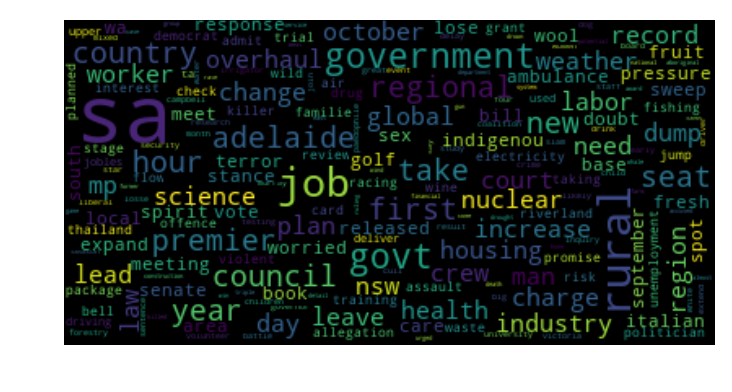

Cluster 5


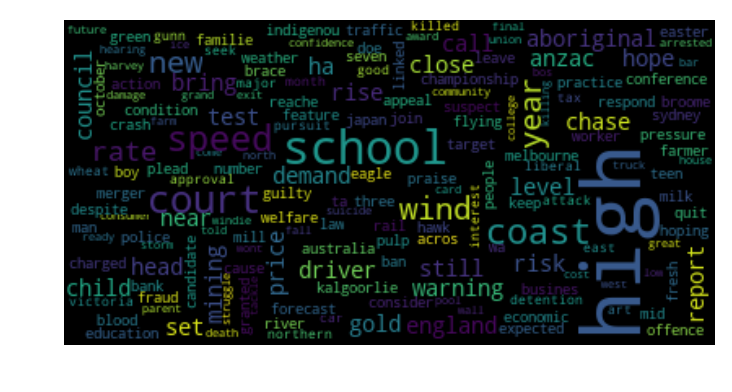

Cluster 6


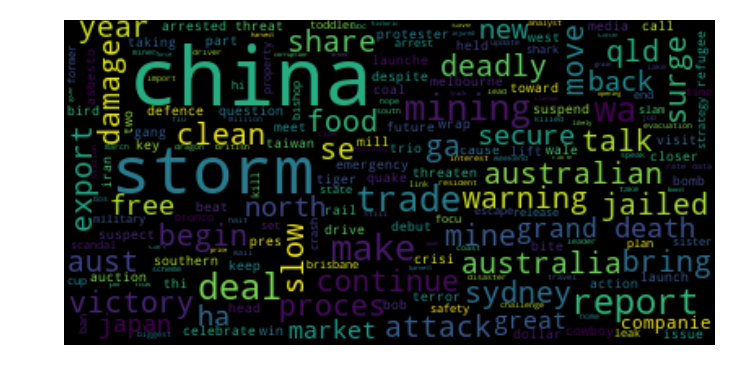

Cluster 7


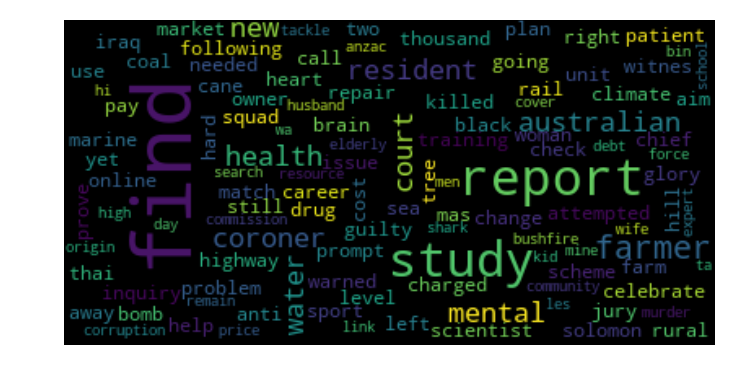

Cluster 8


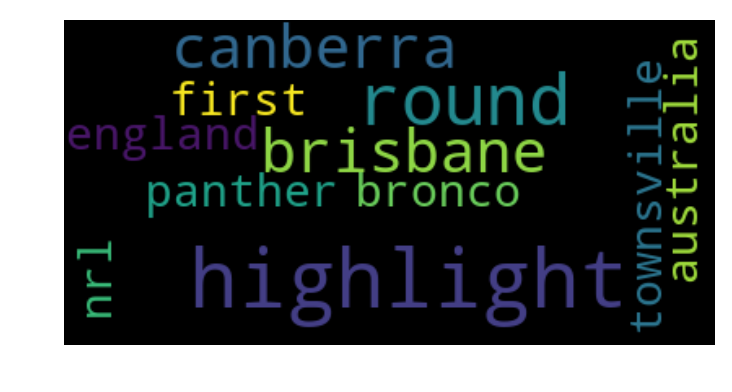

Cluster 9


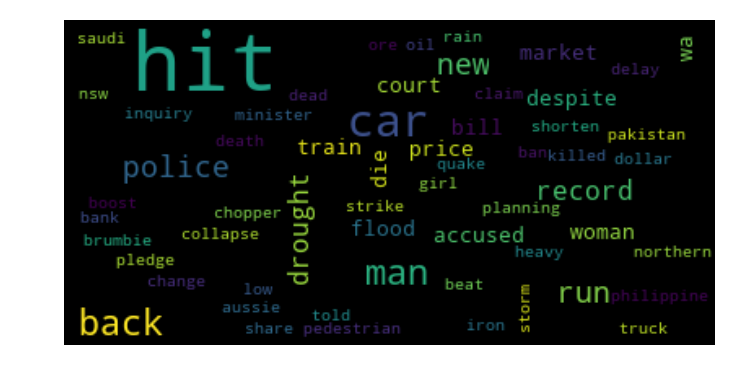

Cluster 10


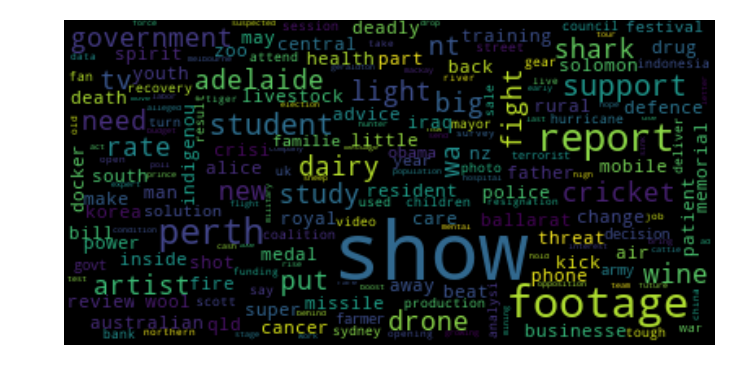

Cluster 11


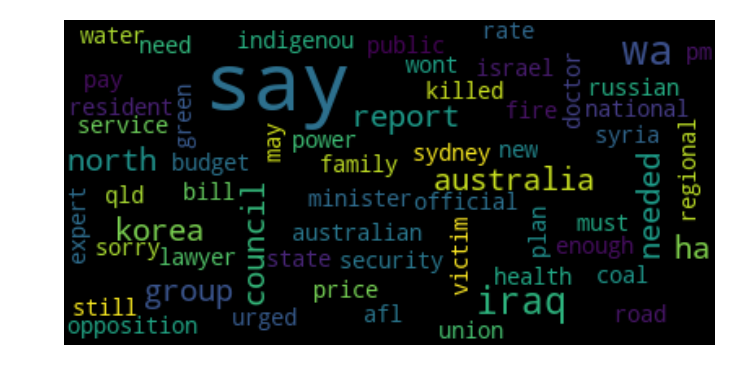

Cluster 12


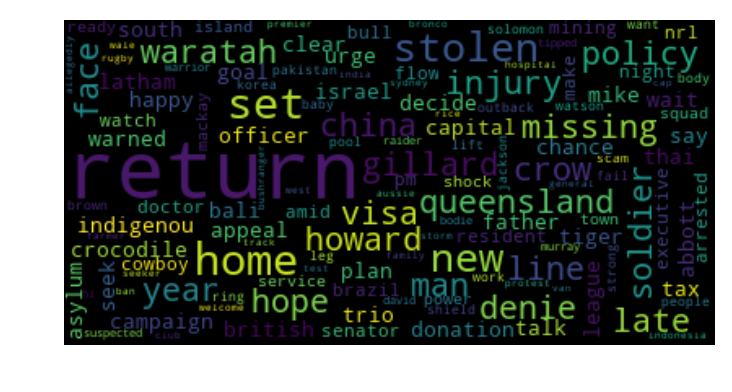

Cluster 13


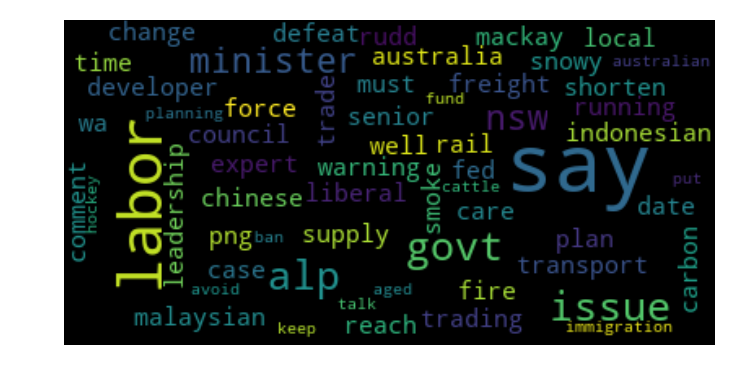

Cluster 14


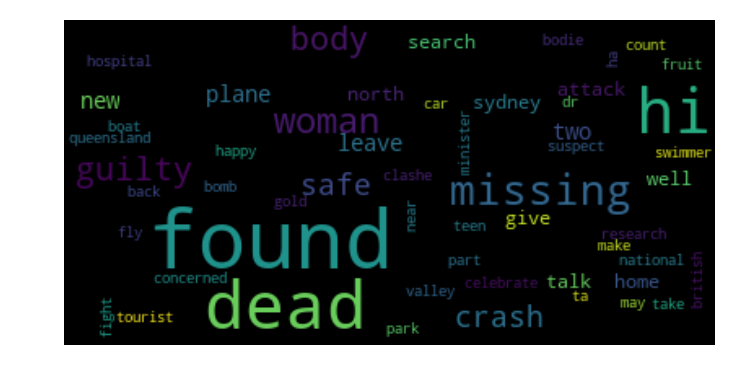

Cluster 15


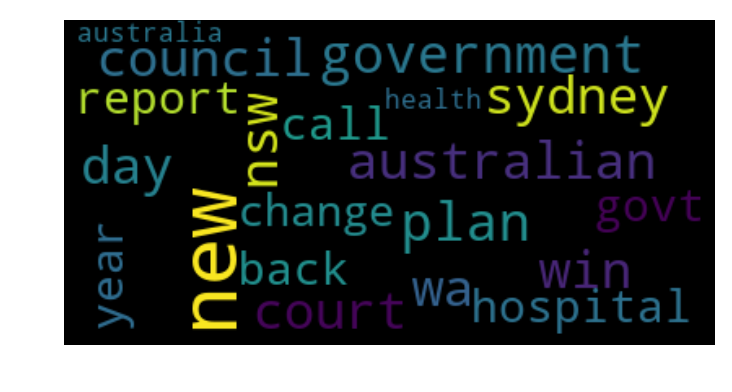

Cluster 16


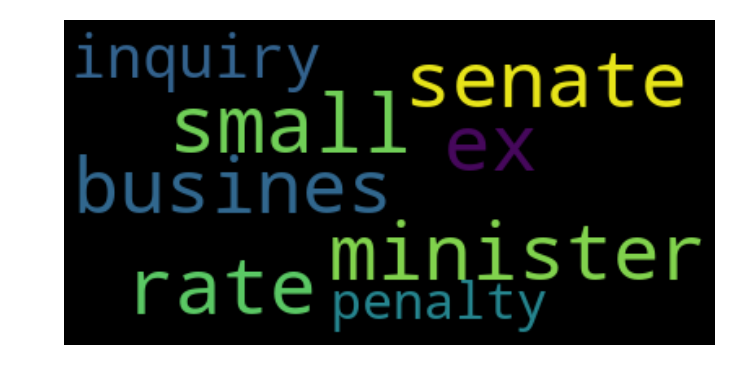

Cluster 17


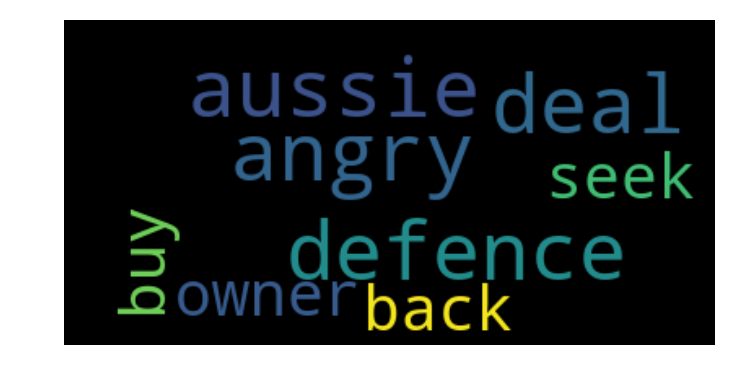

Cluster 18


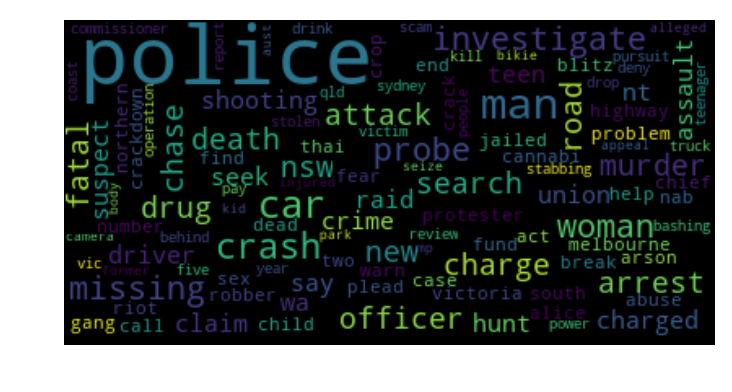

Cluster 19


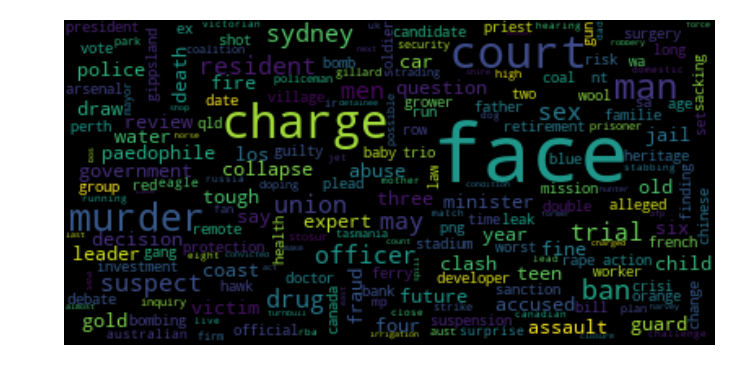

Cluster 20


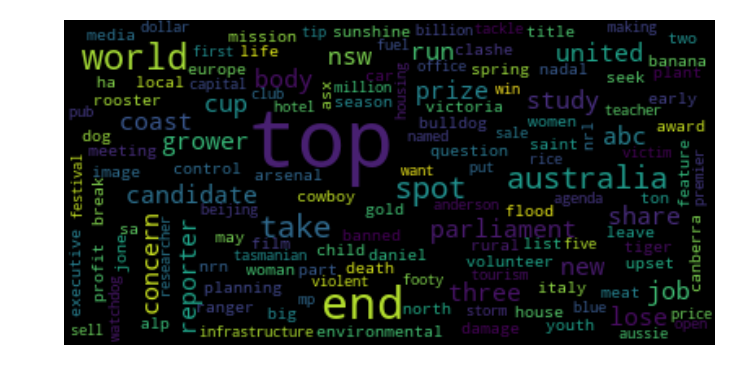

Cluster 21


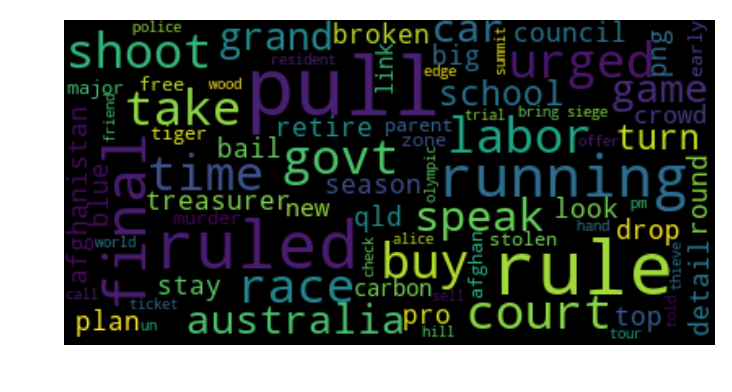

Cluster 22


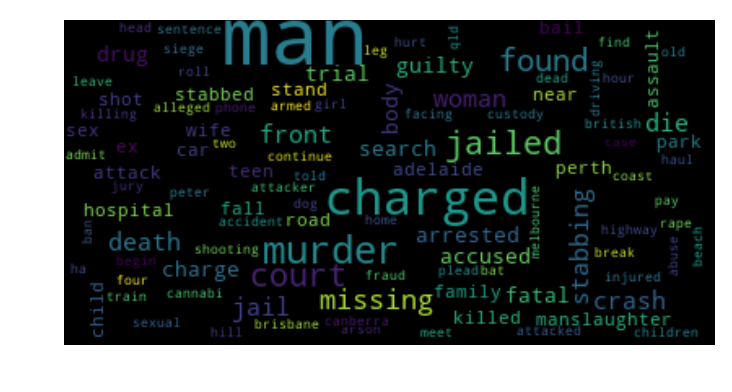

Cluster 23


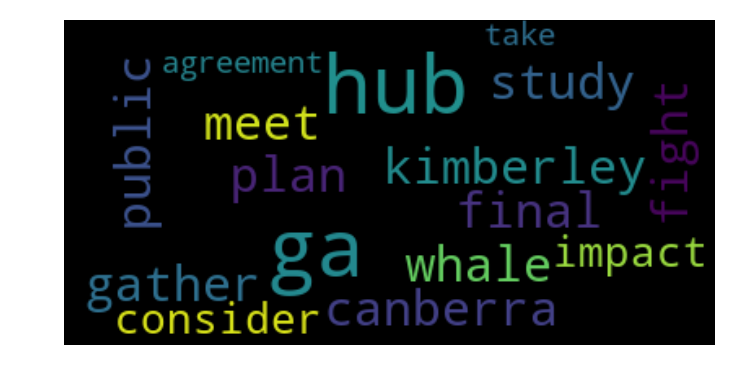

Cluster 24


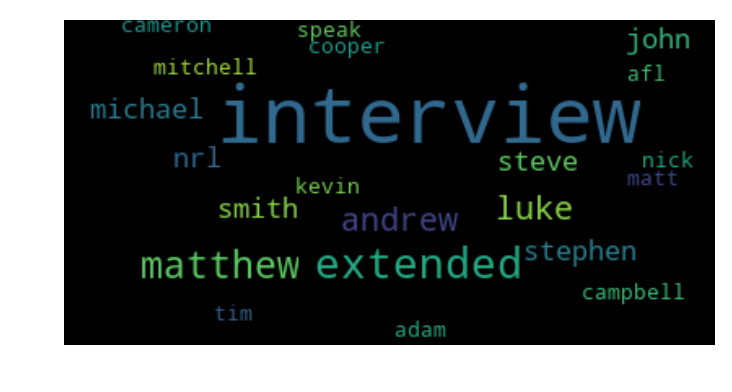

In [22]:
for ind, i in enumerate(wordclouds):
    print("Cluster",ind)
    plt.figure(dpi=140)
    plt.imshow(i, interpolation="bilinear")
    plt.axis("off")
    plt.show()